# Project Summary

Data for analysis -

1. Customers
2. Credit Profiles
3. Transactions

In [33]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [7]:
df_cust = pd.read_csv('customers.csv')
df_cust.head(5)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [11]:
df_cust.shape

(1000, 8)

In [15]:
df_cust.isnull().sum()

cust_id            0
name               0
gender             0
age                0
location           0
occupation         0
annual_income     50
marital_status     0
dtype: int64

In [39]:
df_cust[df_cust['annual_income'].isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
14,15,Sanjana Malik,Female,25,Rural,Artist,NaN,Married
82,83,Reyansh Mukherjee,Male,27,City,Freelancer,NaN,Single
97,98,Virat Puri,Male,47,Suburb,Business Owner,NaN,Married
102,103,Aarav Shah,Male,32,City,Data Scientist,NaN,Married
155,156,Kiaan Saxena,Male,24,City,Fullstack Developer,NaN,Married
170,171,Advait Verma,Male,52,City,Business Owner,NaN,Single
186,187,Samar Sardar,Male,53,City,Consultant,NaN,Single
192,193,Ishan Joshi,Male,37,Suburb,Data Scientist,NaN,Married
227,228,Advait Mukherjee,Male,48,City,Business Owner,NaN,Married
232,233,Aditya Goel,Male,26,City,Freelancer,NaN,Married


In [41]:
meanIncome = df_cust['annual_income'].mean()
medianIncome = df_cust['annual_income'].median()
stddevIncome = df_cust['annual_income'].std()

meanIncome,medianIncome,stddevIncome

(139410.31473684212, 112218.5, 112416.80200711894)

In [53]:
#get the occupation wise median salary
#grpOccupation = df_cust.groupby('occupation')
medianOccupation = df_cust.groupby('occupation')['annual_income'].median()
medianOccupation
#medianOccupation["Artist"]

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [147]:
#replacing null value of every occupation with it's median
def getOccupationWiseAnnualIncome(row):
    if pd.isnull(row['annual_income']):
        return medianOccupation[row["occupation"]]
    else:
        return row["annual_income"]

In [153]:
getOccupationWiseAnnualIncome({"occupation": 'Artist',"annual_income": None})

45794.0

In [141]:
df_cust["annual_income"]=df_cust.apply(
    getOccupationWiseAnnualIncome,
    axis=1)

In [143]:
df_cust[df_cust['annual_income'].isna()]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income


In [145]:
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
annnual_income    0
dtype: int64

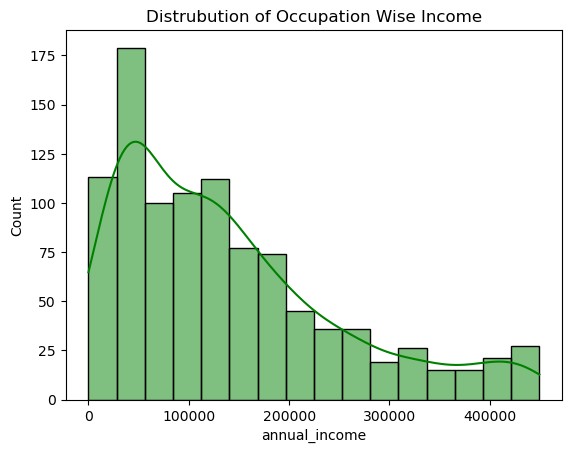

In [107]:
#outlier detection -> right skewed
sns.histplot(df_cust['annual_income'],color='green',kde=True)
plt.title('Distrubution of Occupation Wise Income')
plt.show()

In [105]:
df_cust.describe()

,cust_id,age,annual_income,annnual_income
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,138916.765500,138916.765500
std,288.819436,15.666155,110969.408643,110969.408643
min,1.000000,1.000000,2.000000,2.000000
25%,250.750000,26.000000,48229.500000,48229.500000
50%,500.500000,32.000000,113416.000000,113416.000000
75%,750.250000,46.000000,192614.000000,192614.000000
max,1000.000000,135.000000,449346.000000,449346.000000


In [115]:
#iterating over df
for index,row in df_cust.iterrows():
    print(index,'\n',row)
   

0 
 cust_id                        1
name               Manya Acharya
gender                    Female
age                            2
location                    City
occupation        Business Owner
annual_income           358211.0
marital_status           Married
annnual_income          358211.0
Name: 0, dtype: object
1 
 cust_id                       2
name              Anjali Pandey
gender                   Female
age                          47
location                   City
occupation           Consultant
annual_income           65172.0
marital_status           Single
annnual_income          65172.0
Name: 1, dtype: object
2 
 cust_id                        3
name              Aaryan Chauhan
gender                      Male
age                           21
location                    City
occupation            Freelancer
annual_income            22378.0
marital_status           Married
annnual_income           22378.0
Name: 2, dtype: object
3 
 cust_id                    4
name

In [117]:
#using at function
df_cust.at[4,"occupation"]   #index,column name

'Consultant'

In [159]:
#in annual income column if the income is <100, replace it with the median income of that particular occupation
occGrp = df_cust.groupby('occupation')['annual_income'].median()
occGrp

occupation
Accountant              65265.0
Artist                  45794.0
Business Owner         261191.5
Consultant              58017.0
Data Scientist         135759.0
Freelancer              46759.0
Fullstack Developer     76774.0
Name: annual_income, dtype: float64

In [161]:
df_cust[df_cust['annual_income']<100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income
31,32,Veer Mistry,Male,50,City,Business Owner,50.0,Married,50.0
262,263,Vivaan Tandon,Male,53,Suburb,Business Owner,50.0,Married,50.0
316,317,Yuvraj Saxena,Male,47,City,Consultant,50.0,Married,50.0
333,334,Avani Khanna,Female,29,City,Data Scientist,50.0,Married,50.0
340,341,Priya Sinha,Female,33,Rural,Fullstack Developer,50.0,Married,50.0
543,544,Advait Batra,Male,54,City,Consultant,2.0,Married,2.0
592,593,Priya Gandhi,Female,32,City,Business Owner,50.0,Married,50.0
633,634,Rudra Mehtani,Male,26,City,Data Scientist,2.0,Married,2.0
686,687,Vihaan Jaiswal,Male,40,City,Business Owner,2.0,Married,2.0
696,697,Ishan Negi,Male,47,City,Consultant,20.0,Married,20.0


In [169]:
dictMedianIncomes={}
for key,value in occGrp.items():
    dictMedianIncomes[key]=value
print(dictMedianIncomes)

{'Accountant': 65265.0, 'Artist': 45794.0, 'Business Owner': 261191.5, 'Consultant': 58017.0, 'Data Scientist': 135759.0, 'Freelancer': 46759.0, 'Fullstack Developer': 76774.0}


In [187]:
for index,row in df_cust.iterrows():
    if row['annual_income']<100:
        occupation = df_cust.at[index,'occupation']
        df_cust.at[index,'annual_income']=dictMedianIncomes[occupation]

In [189]:
df_cust[df_cust['annual_income']<100]  #no record with lkess than 100 annual income

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income


In [195]:
#data visualization of annual income 
#average incomes across all occupations

occGrpMean = df_cust.groupby('occupation')['annual_income'].mean()
occGrpMean

occupation
Accountant              64123.562500
Artist                  45309.236842
Business Owner         268447.368512
Consultant              60703.154639
Data Scientist         137021.266304
Freelancer              76327.508772
Fullstack Developer     78727.972973
Name: annual_income, dtype: float64

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\590916845.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occGrpMean.index,y=occGrpMean.values,palette='tab10')


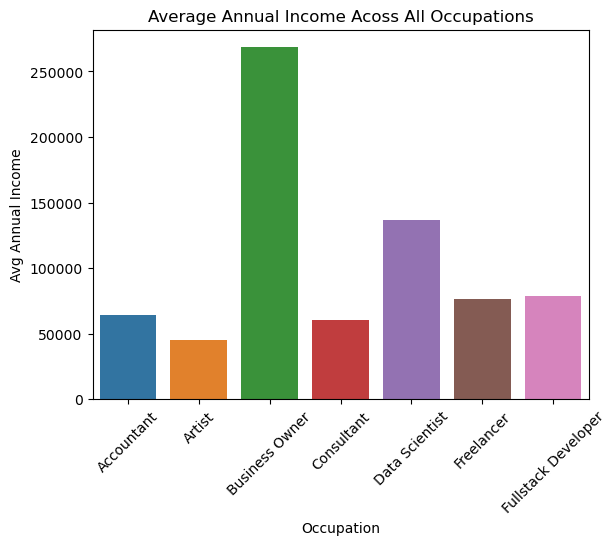

In [217]:
sns.barplot(x=occGrpMean.index,y=occGrpMean.values,palette='tab10')
plt.xticks(rotation=45)
plt.title('Average Annual Income Acoss All Occupations')
plt.xlabel('Occupation')
plt.ylabel('Avg Annual Income')
plt.show()

In [219]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married,358211.0
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single,65172.0
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married,22378.0
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married,33563.0
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married,39406.0
...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26,City,Freelancer,46759.0,Married,46759.0
996,997,Aarav Dhawan,Male,55,City,Business Owner,290061.0,Single,290061.0
997,998,Rehan Jha,Male,29,City,Fullstack Developer,139141.0,Married,139141.0
998,999,Amara Rathore,Female,47,City,Business Owner,261191.5,Married,261191.5


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\327112328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grpBy.index,y=grpBy.values,palette='tab10')


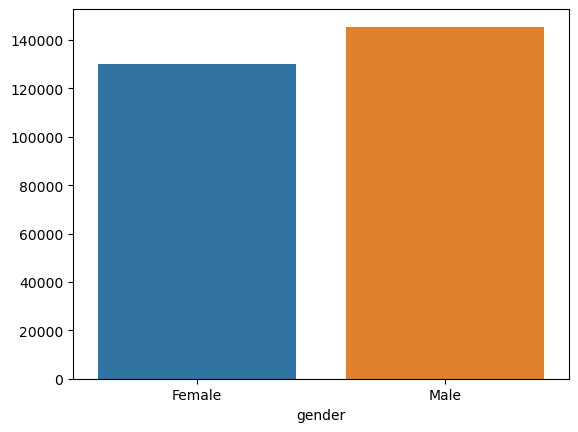

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\327112328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grpBy.index,y=grpBy.values,palette='tab10')


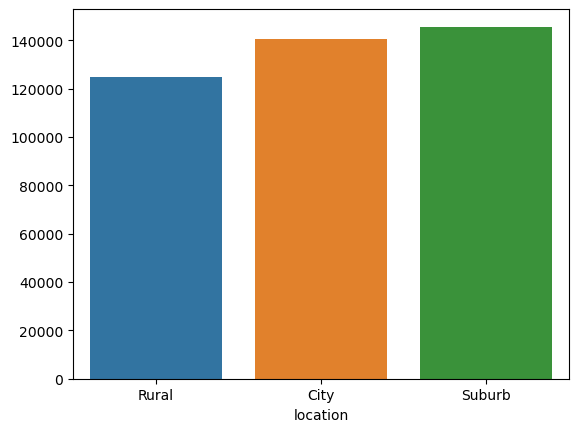

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\327112328.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grpBy.index,y=grpBy.values,palette='tab10')


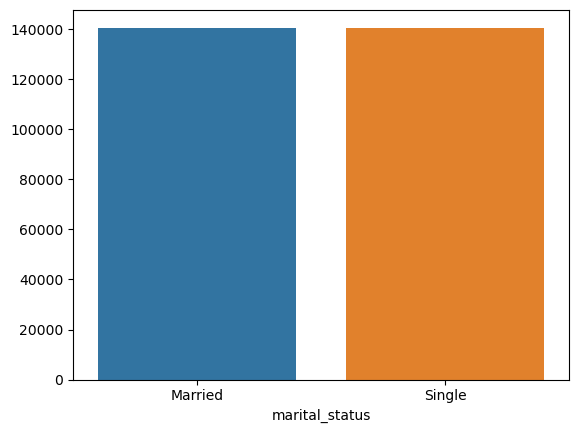

In [229]:
#getting annual incomes across various columns
columns = ['gender','location','marital_status']

for col in columns:
    grpBy = df_cust.groupby(col)['annual_income'].mean().sort_values()
    sns.barplot(x=grpBy.index,y=grpBy.values,palette='tab10')
    plt.show()
    print()

In [233]:
#allowed age is between 15 and 80 years
df_cust['age'].describe()

count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

In [243]:
df_cust[(df_cust['age']<15) | (df_cust['age']>80)].shape

(20, 9)

In [259]:
df_cust[(df_cust['age']<15) | (df_cust['age']>80)]

(7, 9)

In [251]:
#get the median age arcoss occupations and replace the outliers
grpAgeMedian = df_cust.groupby('occupation')['age'].median()
grpAgeMedian

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [265]:
for index,row in df_cust.iterrows():
    if (row['age']<15) | (row['age']>80):
        occupation = row['occupation']
        df_cust.at[index,"age"]=grpAgeMedian[occupation]


In [267]:
df_cust[(df_cust['age']<15) | (df_cust['age']>80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income


In [269]:
#verification
df_cust.iloc[[0]]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0


In [271]:
#age group column using cut function
bins = [17,25,48,56]
labels=['18-25','26-48','49-65']

df_cust['age_group']=pd.cut(df_cust['age'],bins=bins,labels=labels)
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48
...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48


In [279]:
ageGroupCounts = df_cust['age_group'].value_counts(normalize=True)*100
ageGroupCounts

age_group
26-48    61.563518
18-25    26.710098
49-65    11.726384
Name: proportion, dtype: float64

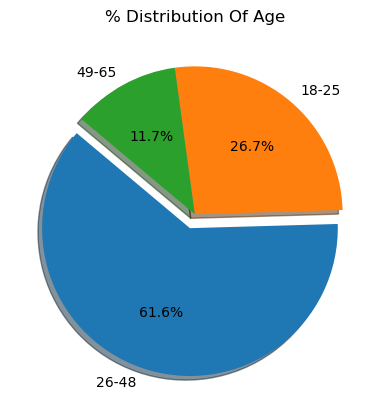

In [295]:
plt.pie(
    ageGroupCounts,
    labels=ageGroupCounts.index,
    autopct='%1.1f%%',
    shadow=True,
    explode=(0.1,0,0),
    startangle=140
)
plt.title('% Distribution Of Age')
plt.show()

In [321]:
#stack bar chart of males and females in every region
regionGenderGroup = df_cust.groupby(['location','gender'])
regionGenderGroup.size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [319]:
type(regionGenderGroup)

pandas.core.groupby.generic.DataFrameGroupBy

In [325]:
newDF=regionGenderGroup.size().unstack()
newDF

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


In [333]:
type(newDF)

pandas.core.frame.DataFrame

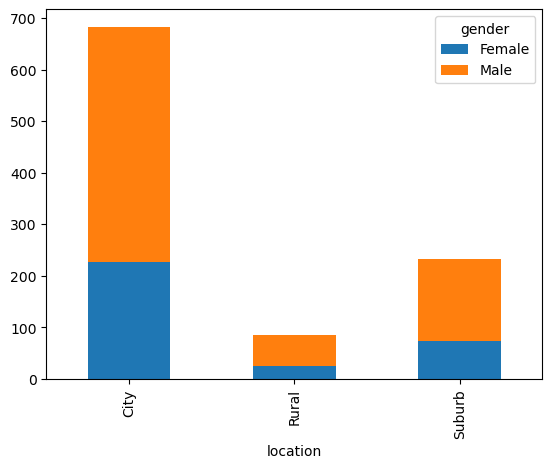

In [349]:
newDF.plot(kind='bar',stacked=True)
plt.show()

In [355]:
creditdf = pd.read_csv('credit_profiles.csv')
creditdf

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [357]:
#4 extra records , which means either extra custids or duplicate customer records added here
creditdf.shape

(1004, 6)

In [361]:
creditdf.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 4
outstanding_debt                   4
credit_inquiries_last_6_months     4
credit_limit                      69
dtype: int64

In [383]:
#duplicate records
creditdf[creditdf.cust_id.duplicated(keep=False)]   #keep=False parameter shows all the duplicate records

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [385]:
#drop the first duplicate
creditdf1 = creditdf.drop_duplicates(subset='cust_id',keep="last")
creditdf1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0
...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0
1000,997,774,0.465462,17139.0,0.0,60000.0
1001,998,529,0.585856,386.0,3.0,1000.0
1002,999,725,0.249670,6973.0,2.0,40000.0


In [387]:
creditdf1[creditdf1.cust_id.duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [395]:
creditdf1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [403]:
#null values in credit_limit column
creditdf1[creditdf1['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
10,11,679,0.557450,9187.0,2.0,NaN
35,36,790,0.112535,4261.0,1.0,NaN
37,38,514,0.296971,238.0,2.0,NaN
45,46,761,0.596041,24234.0,2.0,NaN
64,65,734,0.473715,13631.0,0.0,NaN
...,...,...,...,...,...,...
912,909,479,0.487555,320.0,3.0,NaN
931,928,311,0.832244,316.0,2.0,NaN
948,945,526,0.272734,227.0,1.0,NaN
954,951,513,0.175914,131.0,3.0,NaN


In [405]:
creditdf1['credit_limit'].value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

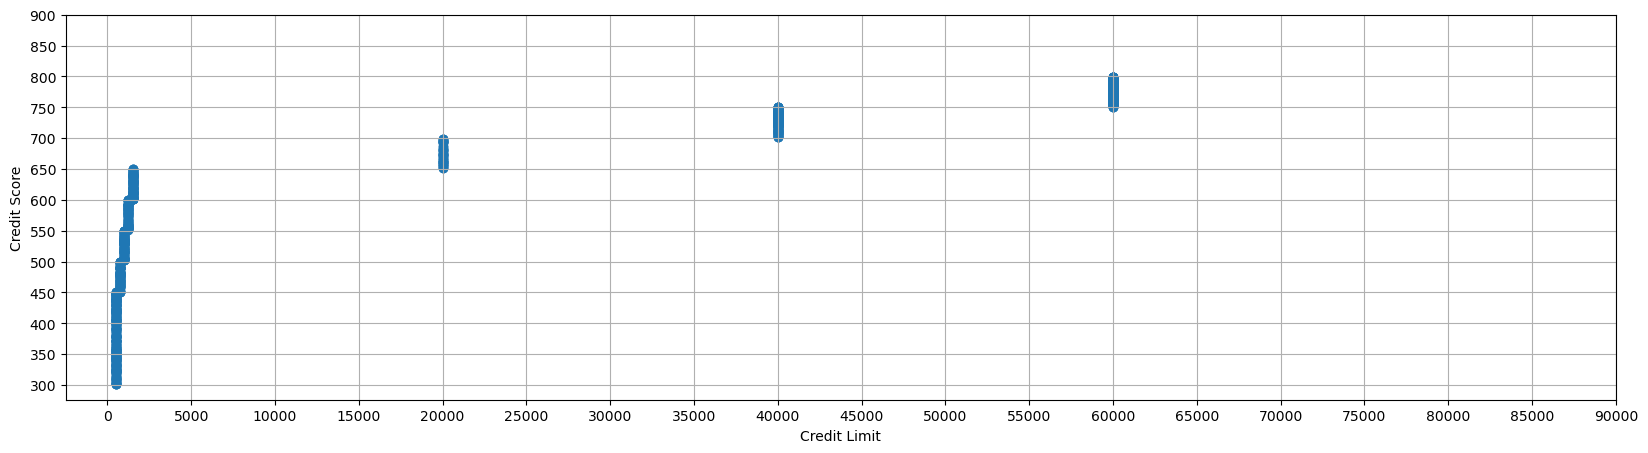

In [441]:
#scatter plot between credit limit and credit utilization
plt.figure(figsize=(20,5))
plt.scatter(creditdf1['credit_limit'],creditdf1['credit_score'])
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.xticks(range(0,90001,5000))
plt.yticks(range(300,901,50))
plt.grid(True)
plt.show()

In [427]:
#create a range of credit_scores and replace Nan with the mode for their range
filt = (creditdf1['credit_limit']>0 ) & (creditdf1['credit_limit']<1000)
creditdf1[filt]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
5,6,442,0.705409,246.0,4.0,500.0
7,8,482,0.121775,76.0,2.0,750.0
11,12,429,0.627645,263.0,0.0,500.0
12,13,476,0.822498,318.0,3.0,750.0
15,16,347,0.531660,190.0,0.0,500.0
...,...,...,...,...,...,...
986,983,459,0.208157,107.0,4.0,750.0
987,984,485,0.633410,330.0,1.0,750.0
989,986,425,0.178470,56.0,4.0,500.0
992,989,497,0.762646,295.0,4.0,750.0


In [469]:
#create a new credit_limit_range column -
binsRange = [300,350,400,450,500,550,600,650,700,750,800]
custlabels = [f'{start}-{end-1}' for start,end in zip(binsRange,binsRange[1:])]

creditdf1['credit_limit_range'] = pd.cut(df['credit_score'], bins=binsRange, labels=custlabels)
creditdf1


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\1049062492.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  creditdf1['credit_limit_range'] = pd.cut(df['credit_score'], bins=binsRange, labels=custlabels)


,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [473]:
binsRange = [300,350,400,450,500,550,600,650,700,750,800]
x=zip(binsRange,binsRange[1:])
print(list(x))

l= [f'{start}-{end-1}' for start,end in zip(binsRange,binsRange[1:])]
l

[(300, 350), (350, 400), (400, 450), (450, 500), (500, 550), (550, 600), (600, 650), (650, 700), (700, 750), (750, 800)]


['300-349',
 '350-399',
 '400-449',
 '450-499',
 '500-549',
 '550-599',
 '600-649',
 '650-699',
 '700-749',
 '750-799']

In [475]:
creditdf1.groupby('credit_limit_range')["credit_limit"].median()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\2520957523.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  creditdf1.groupby('credit_limit_range')["credit_limit"].median()


credit_limit_range
300-349      500.0
350-399      500.0
400-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [485]:
#using mode function
modedf=creditdf1.groupby('credit_limit_range')["credit_limit"].agg(lambda x:x.mode().iloc[0]).reset_index()
modedf

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\826008235.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  modedf=creditdf1.groupby('credit_limit_range')["credit_limit"].agg(lambda x:x.mode().iloc[0]).reset_index()


,credit_limit_range,credit_limit
0,300-349,500.0
1,350-399,500.0
2,400-449,500.0
3,450-499,750.0
4,500-549,1000.0
5,550-599,1250.0
6,600-649,1500.0
7,650-699,20000.0
8,700-749,40000.0
9,750-799,60000.0


in the creditdf1 dataframe, replace the Nan values in the credit_limit column from the modedf frame

In [487]:
creditdf1

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749
...,...,...,...,...,...,...,...
999,996,564,0.702963,688.0,2.0,1250.0,550-599
1000,997,774,0.465462,17139.0,0.0,60000.0,750-799
1001,998,529,0.585856,386.0,3.0,1000.0,500-549
1002,999,725,0.249670,6973.0,2.0,40000.0,700-749


In [489]:
modedf

,credit_limit_range,credit_limit
0,300-349,500.0
1,350-399,500.0
2,400-449,500.0
3,450-499,750.0
4,500-549,1000.0
5,550-599,1250.0
6,600-649,1500.0
7,650-699,20000.0
8,700-749,40000.0
9,750-799,60000.0


In [491]:
#merging two dfs
creditdf2 = pd.merge(creditdf1,modedf,on="credit_limit_range")
creditdf2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit_x,credit_limit_range,credit_limit_y
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
995,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
996,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
997,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [495]:
creditdf2 = pd.merge(creditdf1,modedf,on="credit_limit_range",suffixes=("","_mode"))
creditdf2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
995,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
996,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
997,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [497]:
creditdf2['credit_limit'].isnull().sum()

64

In [499]:
creditdf2['credit_limit_mode'].isnull().sum()

0

In [501]:
#copying credit_limit_mode to credit_limit column
creditlimit2Copy = creditdf2.copy()
#on credit limit column fill NA values from the credit_limit_mode column
creditdf2['credit_limit'].fillna(creditdf2['credit_limit_mode'],inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\208299237.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  creditdf2['credit_limit'].fillna(creditdf2['credit_limit_mode'],inplace=True)


In [505]:
creditdf2['credit_limit'].isnull().sum()

0

In [509]:
creditdf2['outstanding_debt'].describe()

count       999.000000
mean       9692.948949
std       25266.811373
min          33.000000
25%         221.000000
50%         551.000000
75%       11839.000000
max      209901.000000
Name: outstanding_debt, dtype: float64

In [511]:
creditdf2[creditdf2['outstanding_debt']>creditdf2['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-349,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-349,500.0


outstanding_debt cannot be greater than the credit limit, so all above records we will replace the outstanding debt with the credit limit

In [521]:
creditdf2.loc[creditdf2['outstanding_debt']>creditdf2['credit_limit'],'outstanding_debt']=creditdf2['credit_limit']

In [525]:
creditdf2[creditdf2['outstanding_debt']>creditdf2['credit_limit']]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode,outsanding_debt


In [555]:
creditdf2.outstanding_debt.isna().sum()

0

In [527]:
creditdf2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode,outsanding_debt
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0,NaN
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0,NaN
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0,NaN
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0,NaN
...,...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0,NaN
995,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0,NaN
996,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0,NaN
997,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0,NaN


In [ ]:
#co-relation among the credit variables
#bivariate analysis -> finding out relation between 2 variables

#relationship between credit limit and credit score


In [529]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48
...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48


In [531]:
creditdf2

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode,outsanding_debt
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0,NaN
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0,NaN
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0,NaN
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0,NaN
...,...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0,NaN
995,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0,NaN
996,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0,NaN
997,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0,NaN


In [557]:
creditdf2.drop(columns=('outsanding_debt'))

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...
994,996,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
995,997,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
996,998,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
997,999,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [561]:
#merging cust_df and creditdf2 using inner join
mergedCustCreditdf = df_cust.merge(creditdf2,on="cust_id",how="inner")
mergedCustCreditdf

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode,outsanding_debt
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0,NaN
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0,NaN
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0,NaN
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0,NaN
995,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0,NaN
996,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0,NaN
997,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0,NaN


In [563]:
mergedCustCreditdf.drop(columns=('outsanding_debt'))

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0
995,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0
996,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0
997,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0


In [567]:
mergedCustCreditdf

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode,outsanding_debt
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0,NaN
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0,NaN
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0,NaN
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0,NaN
995,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0,NaN
996,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0,NaN
997,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0,NaN


In [571]:
numericalCols = ['annual_income','credit_score','credit_limit','credit_utilisation','outstanding_debt','credit_inquiries_last_6_months']
corrMatrix = mergedCustCreditdf[numericalCols].corr()
corrMatrix

,annual_income,credit_score,credit_limit,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months
annual_income,1.000000,0.575794,0.684653,-0.085740,0.555506,0.002359
credit_score,0.575794,1.000000,0.848261,-0.068281,0.680852,-0.002516
credit_limit,0.684653,0.848261,1.000000,-0.079631,0.810502,0.014197
credit_utilisation,-0.085740,-0.068281,-0.079631,1.000000,0.193771,-0.013134
outstanding_debt,0.555506,0.680852,0.810502,0.193771,1.000000,0.019389
credit_inquiries_last_6_months,0.002359,-0.002516,0.014197,-0.013134,0.019389,1.000000


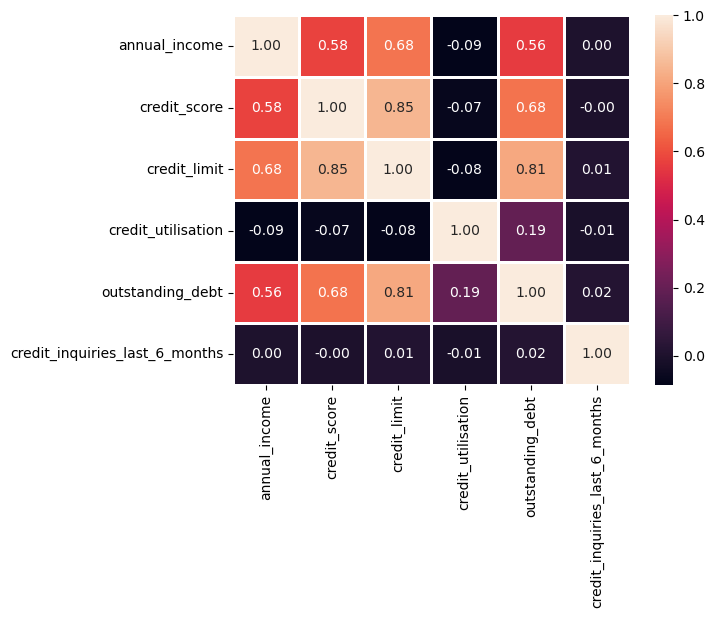

In [583]:
sns.heatmap(corrMatrix,linewidths='0.8',annot=True,fmt='.2f')
plt.show()

## Analysing the Transactions Table

In [586]:
transdf = pd.read_csv('transactions.csv')
transdf

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,53022,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224,NaN,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [588]:
transdf.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [592]:
transdf.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [596]:
transdf[transdf['platform'].isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,NaN,Electronics,Net Banking
418,419,383,2023-01-01,338,NaN,Electronics,Credit Card
607,608,421,2023-01-01,700,NaN,Electronics,Phonepe
844,845,945,2023-01-01,493,NaN,Sports,Credit Card
912,913,384,2023-01-01,85,NaN,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,NaN,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,NaN,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,NaN,Sports,Net Banking
499833,499834,616,2023-09-05,97,NaN,Fashion & Apparel,Credit Card


In [602]:
transdf['platform'].unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', nan], dtype=object)

In [604]:
transdf.platform.value_counts()

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

In [616]:
#finding relation between product_category and platform
grp = transdf.groupby('platform')['product_category'].value_counts()
grp

platform  product_category      
Alibaba   Electronics               19207
          Fashion & Apparel         17173
          Kitchen Appliances         8603
          Beauty & Personal Care     8475
          Sports                     7346
                                    ...  
Shopify   Sports                     3948
          Home Decor                 3141
          Garden & Outdoor           1809
          Books                      1155
          Toys & Games                757
Name: count, Length: 63, dtype: int64

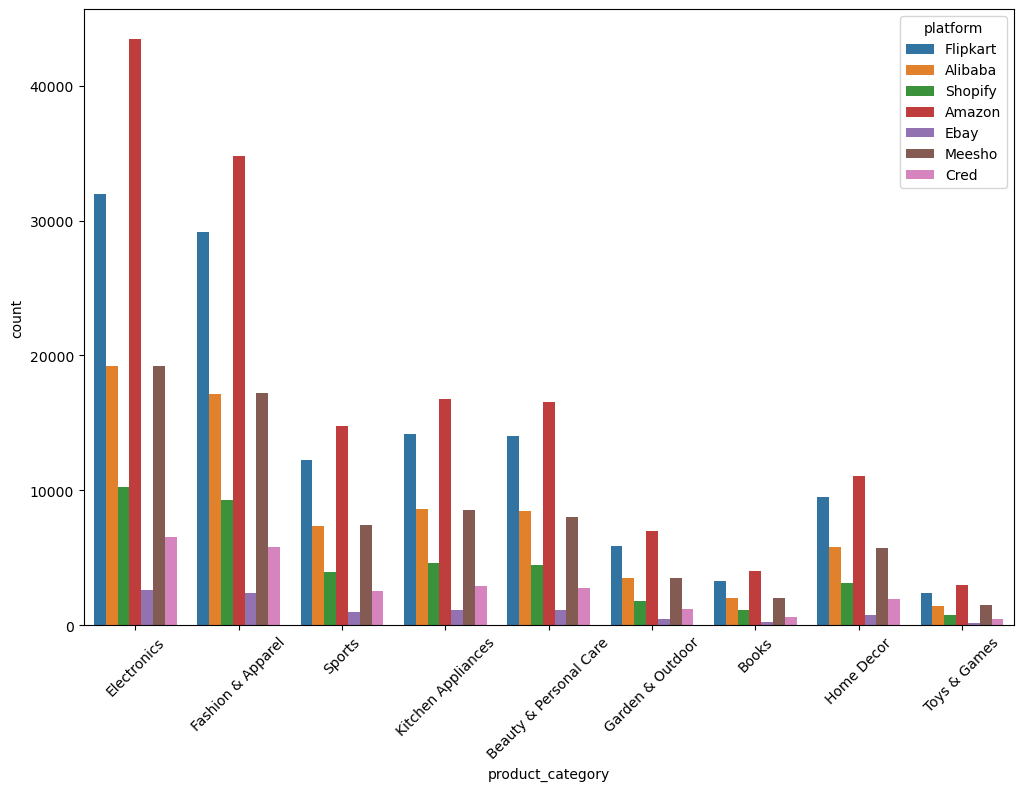

In [626]:
#countplt
plt.figure(figsize=(12,8))
sns.countplot(x="product_category",hue="platform",data=transdf)
plt.xticks(rotation=45)
plt.show()

From the above count plot it is clear that for all product categories, amazon is the dominating platform. So, replacing all the NULL values in platform column with Amazon

In [629]:
transdf['platform'].fillna('Amazon',inplace=True)

In [633]:
transdf['platform'].isnull().sum()

0

In [637]:
transdf.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711634,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [651]:
#outlier detection in tran_amount column
transdfZero= transdf[transdf.tran_amount==0]
transdfZero

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [655]:
transdfZero[["platform","product_category","payment_type"]].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [681]:
#filtering records where plat=amazon, product_category=electronics,payment_type=credit
filt = (transdf['platform']=='Amazon')&(transdf['product_category']=='Electronics')&(transdf['payment_type']=='Credit Card')
transdf1 = transdf[filt]
transdf1

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [683]:
transdf1.shape

(15637, 7)

In [685]:
medianToReplace= transdf1[transdf1['tran_amount']>0].tran_amount.median()
medianToReplace

554.0

In [687]:
transdf1['tran_amount']=transdf1['tran_amount'].replace(0,medianToReplace)
transdf1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\3075441392.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transdf1['tran_amount']=transdf1['tran_amount'].replace(0,medianToReplace)


,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
120,121,440,2023-01-01,554,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,554,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card
499885,499886,520,2023-09-05,643,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,554,Amazon,Electronics,Credit Card


In [691]:
transdf1[transdf1['tran_amount']==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


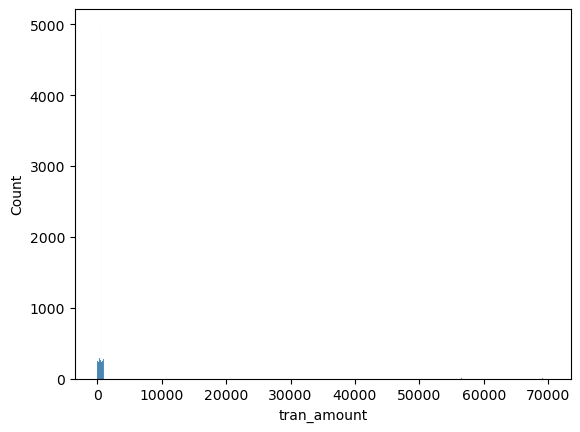

In [693]:
#outlier detection
sns.histplot(transdf1.tran_amount)
plt.show()

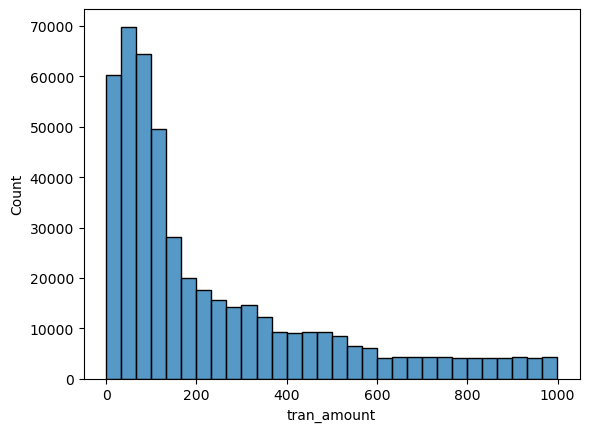

In [715]:
#checking values where tran_amount>1000
filt = transdf['tran_amount']<10000
sns.histplot(transdf[filt]['tran_amount'],bins=30)
plt.show()

In [727]:
#iqr=q3-q1
q1,q3=transdf['tran_amount'].quantile([0.25,0.75])
IQR = q3-q1
lower = q1-(2*IQR)
upper = q3+(2*IQR)
lower,upper

#anything above upper is outlier

(-602.0, 1063.0)

In [731]:
#any value less than the upper bound is not outlier
normal_df = transdf[transdf['tran_amount']<upper]
normal_df

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [753]:
#to replace the outliers , get the mean of tran amount across all the product categories
category_spend_mean = normal_df.groupby('product_category')['tran_amount'].mean()
category_spend_mean

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               489.652079
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [741]:
#get df of all outliers
outlier_df = transdf[transdf['tran_amount']>upper]
outlier_df

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [755]:
#from the original dataframe get all the outliers and replace those outliers with the mean of all the product categories
transdf.loc[outlier_df.index,'tran_amount']=outlier_df['product_category'].map(category_spend_mean)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\2594900876.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  transdf.loc[outlier_df.index,'tran_amount']=outlier_df['product_category'].map(category_spend_mean)


In [759]:
#outliers removed
transdf[transdf['tran_amount']>upper]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


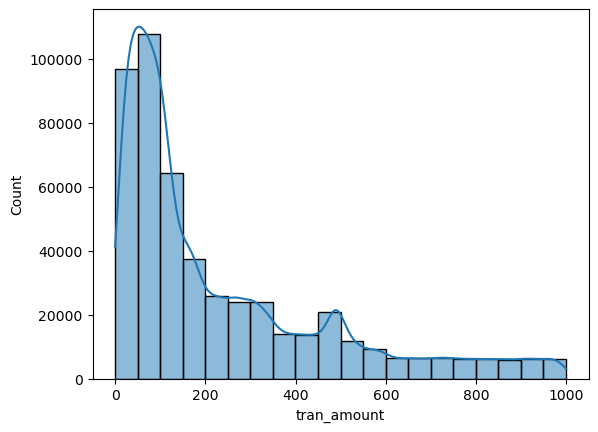

In [763]:
sns.histplot(transdf['tran_amount'],kde=True,bins=20)
plt.show()

In [765]:
#count plot for payment type column
transdf

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.000000,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.000000,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.000000,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.000000,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.000000,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43.000000,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224.000000,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538.000000,Flipkart,Home Decor,Gpay


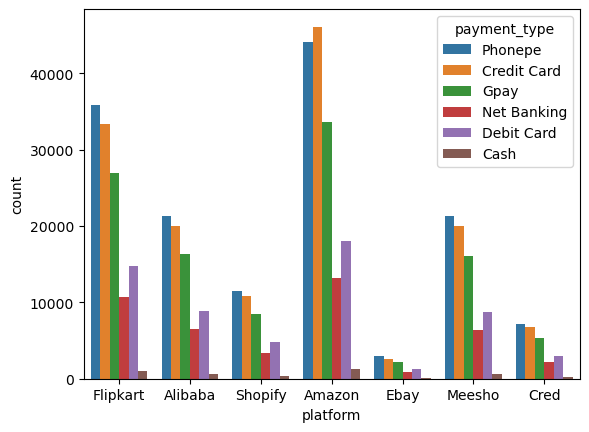

<Figure size 1200x800 with 0 Axes>

In [783]:
sns.countplot(x='platform',hue='payment_type',data=transdf)
plt.figure(figsize=(12,8))
plt.show()

In [785]:
#get age wise spending across various payment type
transdf

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.000000,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.000000,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.000000,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.000000,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.000000,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499995,499996,791,2023-09-05,43.000000,Amazon,Books,Phonepe
499996,499997,569,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499997,499998,57,2023-09-05,224.000000,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538.000000,Flipkart,Home Decor,Gpay


In [787]:
df_cust

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48
...,...,...,...,...,...,...,...,...,...,...
995,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48
996,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65
997,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48
998,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48


In [797]:
#merging df_cust and transdf
mergedCutsTransdf = df_cust.merge(transdf,on="cust_id",how="left")
mergedCutsTransdf

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,495592,2023-09-03,63.0,Shopify,Fashion & Apparel,Gpay
499996,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,495907,2023-09-03,743.0,Alibaba,Electronics,Phonepe
499997,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,496570,2023-09-04,20.0,Cred,Books,Credit Card
499998,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,497591,2023-09-04,558.0,Alibaba,Home Decor,Net Banking


In [817]:
mergedCustCreditdf

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_range,credit_limit_mode,outsanding_debt
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0,NaN
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,65172.0,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,22378.0,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0,NaN
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,33563.0,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0,NaN
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,39406.0,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,996,Manya Vasudeva,Female,26.0,City,Freelancer,46759.0,Married,46759.0,26-48,564,0.702963,688.0,2.0,1250.0,550-599,1250.0,NaN
995,997,Aarav Dhawan,Male,55.0,City,Business Owner,290061.0,Single,290061.0,49-65,774,0.465462,17139.0,0.0,60000.0,750-799,60000.0,NaN
996,998,Rehan Jha,Male,29.0,City,Fullstack Developer,139141.0,Married,139141.0,26-48,529,0.585856,386.0,3.0,1000.0,500-549,1000.0,NaN
997,999,Amara Rathore,Female,47.0,City,Business Owner,261191.5,Married,261191.5,26-48,725,0.249670,6973.0,2.0,40000.0,700-749,40000.0,NaN


In [819]:
mergedCutsTransdf

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,annnual_income,age_group,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay
3,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1576,2023-01-01,149.0,Amazon,Beauty & Personal Care,Phonepe
4,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,358211.0,49-65,1757,2023-01-01,37.0,Flipkart,Fashion & Apparel,Credit Card
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,495592,2023-09-03,63.0,Shopify,Fashion & Apparel,Gpay
499996,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,495907,2023-09-03,743.0,Alibaba,Electronics,Phonepe
499997,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,496570,2023-09-04,20.0,Cred,Books,Credit Card
499998,1000,Akshay Choudhary,Male,28.0,City,Freelancer,226873.0,Married,226873.0,26-48,497591,2023-09-04,558.0,Alibaba,Home Decor,Net Banking


<Axes: xlabel='age_group', ylabel='count'>

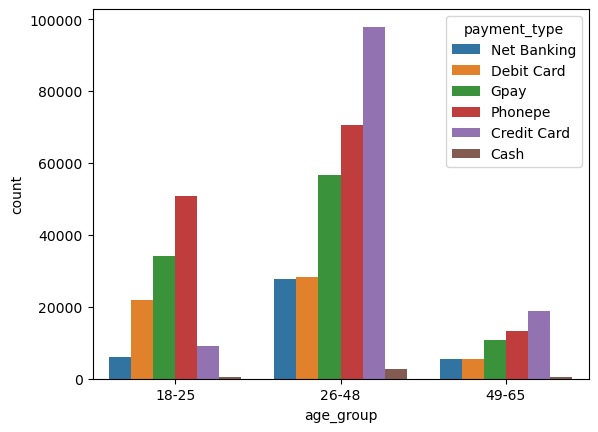

In [825]:
sns.countplot(x='age_group',hue='payment_type',data=mergedCutsTransdf)

<Axes: xlabel='age_group', ylabel='count'>

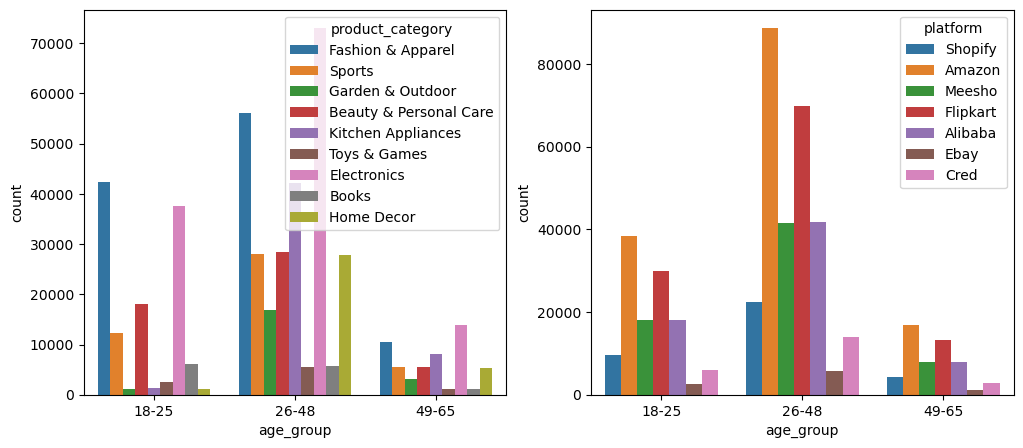

In [837]:
#plotting multiple plots
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='age_group',hue='product_category',data=mergedCutsTransdf,ax=ax1)
sns.countplot(x='age_group',hue='platform',data=mergedCutsTransdf,ax=ax2)

In [847]:
#average annual income by age group 

ageGroupMeanIncome = mergedCutsTransdf.groupby('age_group')['annual_income'].mean()
ageMeanIncome = ageGroupMeanIncome.reset_index()
ageMeanIncome

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\3104294916.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageGroupMeanIncome = mergedCutsTransdf.groupby('age_group')['annual_income'].mean()


,age_group,annual_income
0,18-25,37138.181054
1,26-48,146092.690672
2,49-65,246386.586325


C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\1218570846.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ageMeanIncome['age_group'],y=ageMeanIncome['annual_income'],palette='coolwarm')


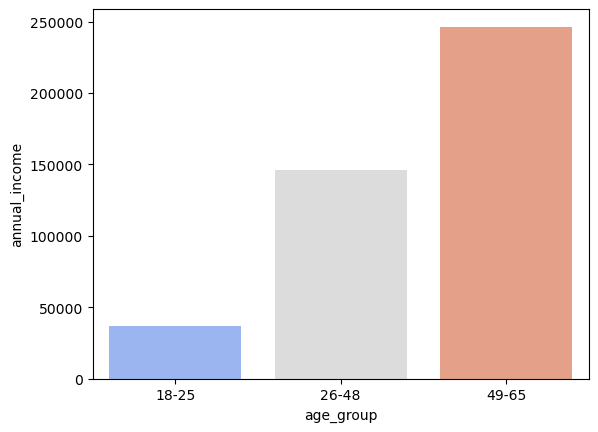

In [862]:
sns.barplot(x=ageMeanIncome['age_group'],y=ageMeanIncome['annual_income'],palette='coolwarm')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\53152968.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ageGroupCreditLimit=mergedCustCreditdf.groupby('age_group')['credit_limit'].mean().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\53152968.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ageGroupCreditLimit.age_group,y=ageGroupCreditLimit.credit_limit,palette='coolwarm')


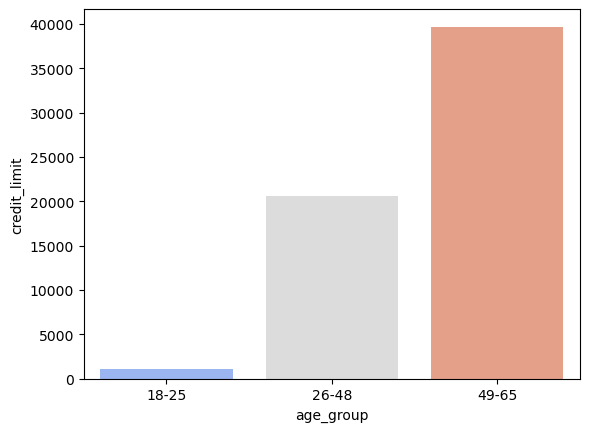

In [884]:
#average credit limit by age group
ageGroupCreditLimit=mergedCustCreditdf.groupby('age_group')['credit_limit'].mean().reset_index()
ageGroupCreditLimit

sns.barplot(x=ageGroupCreditLimit.age_group,y=ageGroupCreditLimit.credit_limit,palette='coolwarm')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\1644922960.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  averageCreditScoreAgeGroup=mergedCustCreditdf.groupby('age_group')['credit_score'].mean().reset_index()
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\1644922960.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=averageCreditScoreAgeGroup['age_group'],y=averageCreditScoreAgeGroup['credit_score'],palette='coolwarm')


<Axes: xlabel='age_group', ylabel='credit_score'>

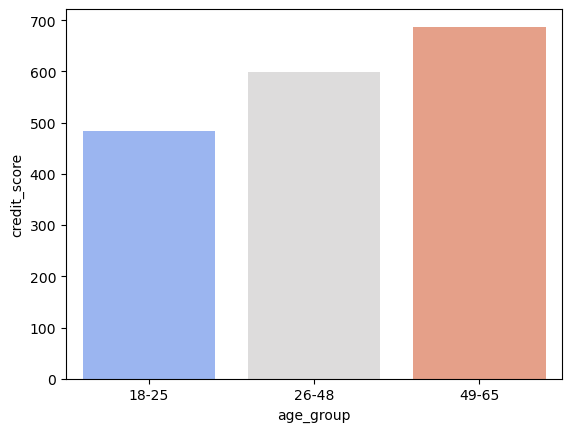

In [888]:
#averrage credit score by age group
averageCreditScoreAgeGroup=mergedCustCreditdf.groupby('age_group')['credit_score'].mean().reset_index()
averageCreditScoreAgeGroup

sns.barplot(x=averageCreditScoreAgeGroup['age_group'],y=averageCreditScoreAgeGroup['credit_score'],palette='coolwarm')

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\3796398056.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ageMeanIncome['age_group'],y=ageMeanIncome['annual_income'],palette='coolwarm',ax=ax1)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\3796398056.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=averageCreditScoreAgeGroup['age_group'],y=averageCreditScoreAgeGroup['credit_score'],palette='coolwarm',ax=ax2)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_34388\3796398056.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ageGro

<Axes: xlabel='age_group', ylabel='credit_limit'>

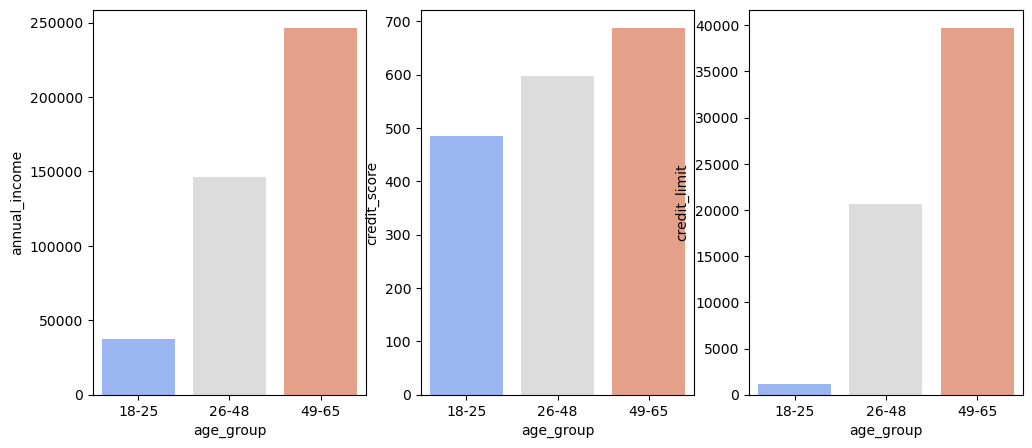

In [922]:
#print all the subplots in a single line
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,5))
sns.barplot(x=ageMeanIncome['age_group'],y=ageMeanIncome['annual_income'],palette='coolwarm',ax=ax1)
sns.barplot(x=averageCreditScoreAgeGroup['age_group'],y=averageCreditScoreAgeGroup['credit_score'],palette='coolwarm',ax=ax2)
sns.barplot(x=ageGroupCreditLimit.age_group,y=ageGroupCreditLimit.credit_limit,palette='coolwarm',ax=ax3)